In [1]:
from aux_func_V3 import *
from aux_gif2D import *
import API_Numpy
import API_TensorFlow
import plotly.express as ply_expz
import plotly.graph_objects as ply_go
from plotly.subplots import make_subplots

import dill
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.config.list_physical_devices('GPU')

[]

In [3]:

nomes = ["WENO-JS", "WENO-Z" , "WENO-Z+", "WENO-D" , "WENO-ZD", "WENO-ZD+"]

# API      = API_Numpy
API      = API_TensorFlow
equation = euler_equation_2D
γ        = 5.0/3.0

WENOs = {}
WENOs[nomes[0]] = simulation_2D(API, equation, WENO_JS_scheme , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[1]] = simulation_2D(API, equation, WENO_Z_scheme  , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[2]] = simulation_2D(API, equation, WENO_Zp_scheme , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[3]] = simulation_2D(API, equation, WENO_D_scheme  , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[4]] = simulation_2D(API, equation, WENO_ZD_2_scheme , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[5]] = simulation_2D(API, equation, WENO_ZDp_4_scheme, γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)

# nomes = ["WENO-JS"]
nomes = ["WENO-ZD+"]


In [4]:
γ = 5.0/3.0
N = 1024

x, y, Δx, Δy, U0 = CondiçãoInicialRayleighTaylor_N(N, γ)

cfl     = 0.3
t_final = 1.95

GhostPointsX = RayleighTaylorGhostPointsX()
GhostPointsY = RayleighTaylorGhostPointsY(γ, dtype=dtype)

In [5]:
for nome in nomes:
    U=create_data_last_frame(
        'RT',
        N,
        nome,
        U0,
        WENOs[nome],
        t_final,
        cfl,
        Δx,
        Δy,
        GhostPointsX,
        GhostPointsY,
        RayleighTaylorGravity,
        continue_flag = False)

    helper_plot(U[0],x,y,nome,
            figsize=(10,16),
            vmin=0.9,
            vmax=2.3,
            levels=15,
            xlim=None,
            ylim=(0.2,0.8))
    plt.savefig(f'imagens/RT-{N}-{nome}.png')
    plt.close()

WENO-ZD+
Tempo inicial: 0


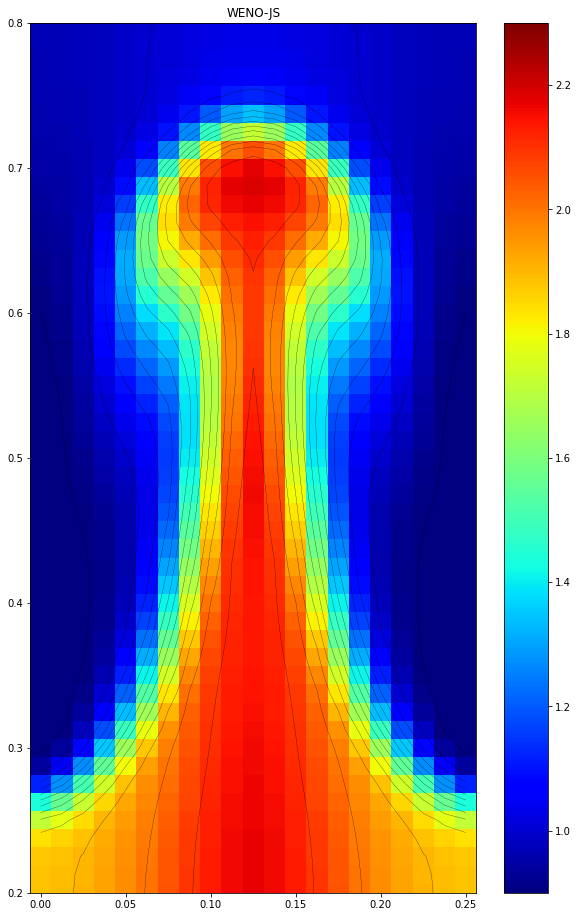

In [26]:
helper_plot(vals[0],
        x,
        y,
        nome,
        figsize=(10,16),
        vmin=0.9,
        vmax=2.3,
        levels=15,
        xlim=None,
        ylim=(0.2,0.8))

In [8]:
vals

<tf.Tensor: shape=(4, 21, 79), dtype=float64, numpy=
array([[[ 2.06919993e+00,  1.99769331e+00,  1.93758924e+00, ...,
          9.89362127e-01,  9.92013839e-01,  9.94516253e-01],
        [ 2.06949751e+00,  1.99962768e+00,  1.94062150e+00, ...,
          9.89450280e-01,  9.91969290e-01,  9.94480859e-01],
        [ 2.07012645e+00,  2.00356412e+00,  1.94673150e+00, ...,
          9.89647167e-01,  9.91925664e-01,  9.94436081e-01],
        ...,
        [ 2.07012645e+00,  2.00356412e+00,  1.94673150e+00, ...,
          9.89647167e-01,  9.91925664e-01,  9.94436081e-01],
        [ 2.06949751e+00,  1.99962768e+00,  1.94062150e+00, ...,
          9.89450280e-01,  9.91969290e-01,  9.94480859e-01],
        [ 2.06919993e+00,  1.99769331e+00,  1.93758924e+00, ...,
          9.89362127e-01,  9.92013839e-01,  9.94516253e-01]],

       [[ 3.93307603e-03,  8.39171237e-03,  9.65005722e-03, ...,
         -1.82962105e-03, -8.09903678e-04, -2.09570177e-04],
        [ 1.15507794e-02,  2.47141552e-02,  2.8470

In [2]:
nomes = ["WENO-JS", "WENO-Z" , "WENO-Z+", "WENO-D" , "WENO-ZD", "WENO-ZD+"]

# API      = API_Numpy
API      = API_TensorFlow
equation = euler_equation_2D
γ        = 7.0/5.0

WENOs = {}
WENOs[nomes[0]] = simulation_2D(API, equation, WENO_JS_scheme   , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[1]] = simulation_2D(API, equation, WENO_Z_scheme    , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[2]] = simulation_2D(API, equation, WENO_Zp_scheme   , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[3]] = simulation_2D(API, equation, WENO_D_scheme    , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[4]] = simulation_2D(API, equation, WENO_ZD_2_scheme , γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)
WENOs[nomes[5]] = simulation_2D(API, equation, WENO_ZDp_4_scheme, γ=γ, mapping=null_mapping, map_function=lambda x:x, network=None, p=2, ε=ε_default)

nomes = ["WENO-JS"]

In [3]:
# for N in (200, 400):
    
N = 400    

γ  = 7.0/5.0
x0 = 1/6

x, y, Δx, Δy, U0 = CondiçãoInicialDoubleMach_N(N, γ, x0)

cfl     = 0.45
t_final = 0.2

label = f'DoubleMach'

GhostPointsX = DoubleMachGhostPointsX(L=3, R=3, γ=γ)
GhostPointsY = DoubleMachGhostPointsY(L=3, R=3, γ=γ, x0=x0, x=x)

for nome in nomes:

    create_data(
        label,
        N,
        nome,
        U0,
        WENOs[nome],
        0.001,
        t_final,
        cfl,
        Δx,
        Δy,
        GhostPointsX,
        GhostPointsY,
        NullForce,
        continue_flag=True)

    create_movie(
        label,
        N,
        nome,
        x,
        y,
        save_dir=label+'Zoomed',
        figsize=(12,9),
        vmin=2,
        vmax=20,
        levels=100,
        xlim=(2.0,3.0),
        ylim=(0,0.6),
        colorbar=False,
        start_time=130)

    create_movie(
        label,
        N,
        nome,
        x,
        y,
        figsize=(3*8,8),
        vmin=1,
        vmax=22,
        levels=100,
        xlim=(0,3),
        ylim=None)

WENO-JS
Tempo inicial: 0.0
Tempo final: 0.20000000000000015                      


In [2]:
nomes = ["WENO-JS", "WENO-Z" , "WENO-Z+", "WENO-D" , "WENO-ZD", "WENO-ZD+", "WENO-Z (MS)"]
cores = {}
cores[nomes[0]] = "#4262C1" 
cores[nomes[1]] = "#C23C52"
cores[nomes[2]] = "#57933B"
cores[nomes[3]] = "#A23CB1"
cores[nomes[4]] = "#C2881D"
cores[nomes[5]] = "#72C5D6"
cores[nomes[6]] = "#AAAAAA"

# API      = API_Numpy
API      = API_TensorFlow
equation = euler_equation_2D
γ        = 7.0/5.0

WENOs = {}
WENOs[nomes[0]] = simulation_2D(API, equation, WENO_JS_scheme   , γ=γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default)
WENOs[nomes[1]] = simulation_2D(API, equation, WENO_Z_scheme    , γ=γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default)
WENOs[nomes[2]] = simulation_2D(API, equation, WENO_Zp_scheme   , γ=γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default)
WENOs[nomes[3]] = simulation_2D(API, equation, WENO_D_scheme    , γ=γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default)
WENOs[nomes[4]] = simulation_2D(API, equation, WENO_ZD_2_scheme , γ=γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default)
WENOs[nomes[5]] = simulation_2D(API, equation, WENO_ZDp_4_scheme, γ=γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default)
WENOs[nomes[6]] = simulation_2D(API, equation, WENO_Z_scheme    , γ=γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default)

nomes = ["WENO-ZD", "WENO-ZD+"]

In [7]:
γ  = 7.0/5.0
θ  = API_Numpy.pi/6.0
N  = 400
x0 = 1/6

x, y, Δx, Δy, U0 = CondiçãoInicialShockEntropy2D_N(N, γ, θ)

cfl     = 0.5
t_final = 1.8

GhostPointsX = ShockEntropy2DGhostPointsX(γ, Δx, y, θ)
GhostPointsY = ShockEntropy2DGhostPointsY()

In [8]:
for nome in nomes:
    
    create_data(
        'ShockEntropy',
        N,
        nome,
        U0,
        WENOs[nome],
        0.01,
        t_final,
        cfl,
        Δx,
        Δy,
        GhostPointsX,
        GhostPointsY,
        NullForce,
        continue_flag=True)

    create_movie(
        'ShockEntropy',
        N,
        nome,
        x,
        y,
        figsize=(2*8,8),
        vmin=0.75,
        vmax=4.75,
        levels=15,
        xlim=None,
        ylim=None)
    
    create_movie(
        'ShockEntropy',
        N,
        nome,
        x,
        y,
        save_dir='ShockEntropyZoomed',
        figsize=(2*8,8),
        vmin=0.75,
        vmax=4.75,
        levels=15,
        xlim=(0.0,3.0),
        ylim=(-1,1),
        colorbar=False)

WENO-ZD
Tempo inicial: 0.0
Tempo final: 1.8000000000000014                       
WENO-ZD+                         
Tempo inicial: 0.0
Tempo final: 1.8000000000000014                       


In [33]:
u  = {}
ux = {}
uy = {}
for nome in nomes:
    with open(f'imagens/ShockEntropy-250-{nome}/data.bkp','rb') as file:
        u[nome]  = dill.load(file)
        u[nome]  = u[nome][u[nome].shape[0]-1]
        ux[nome] = u[nome][0,:,44]  # (y = 0.76)
        uy[nome] = u[nome][0,168,:] # (x = 1.72)
        
with open(f'imagens/ShockEntropy-250-{nome}/data.bkp','rb') as file:
        u[nome]  = dill.load(file)
        u[nome]  = u[nome][u[nome].shape[0]-1]
        ux[nome] = u[nome][0,:,44]  # (y = 0.76)
        uy[nome] = u[nome][0,168,:] # (x = 1.72)

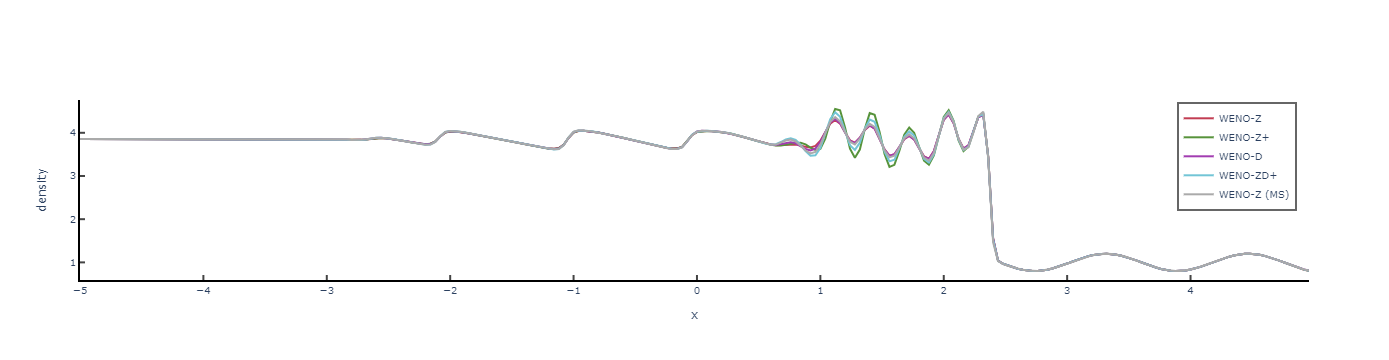

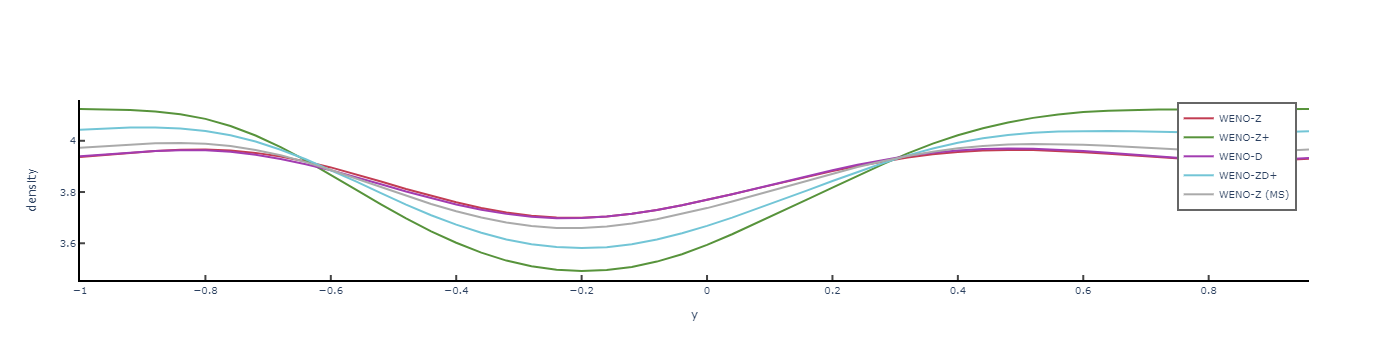

In [42]:
fig_x = make_subplots(
    rows  = 1, 
    cols  = 1
)

fig_y = make_subplots(
    rows  = 1, 
    cols  = 1
)

interval_x = (-5, 5)
interval_y = (-1, 1)

N     = 250
N_ref = 400

Δx       = 10/N
Δy       = Δx
Δx_ref   = 10/N_ref
Δy_ref   = 10/N_ref

malha_x = np.arange(interval_x[0], interval_x[1], Δx, dtype=dtype)
malha_y = np.arange(interval_y[0], interval_y[1], Δy, dtype=dtype)

x_ref = np.arange(interval_x[0], interval_x[1], Δx_ref, dtype=dtype)
y_ref = np.arange(interval_y[0], interval_y[1], Δy_ref, dtype=dtype)

#     fig.add_trace(
#         ply_go.Scatter(
#             x     = x_ref,
#             y     = y_ref,
#             mode  = "lines"                                          ,
#             line  = ply_go.scatter.Line(color = "#666666", width = 1),
#             name  = "Reference"                                      ,
#             xaxis = "x"                                              ,
#             yaxis = "y"                                              ,
#             legendgroup = "Reference"
#         ),
#         row = 1,
#         col = 1
#     )

for nome in nomes:
    y = ux[nome]

    fig_x.add_trace(
        ply_go.Scatter(
            x          = malha_x ,
            y          = y       ,
            mode       = "lines" ,
            name       = nome    ,
            line = ply_go.scatter.Line(
                color = cores[nome],
                width = 2
            )
        ),
        row = 1,
        col = 1
    )

    y = uy[nome]

    fig_y.add_trace(
        ply_go.Scatter(
            x          = malha_y ,
            y          = y       ,
            mode       = "lines" ,
            name       = nome    ,
            line = ply_go.scatter.Line(
                color = cores[nome],
                width = 2
            )
        ),
        row = 1,
        col = 1
    )

fig_x.update_layout(
    paper_bgcolor = "#FFFFFF",
    plot_bgcolor  = "#FFFFFF",
    xaxis         = dict(
        linecolor = "#000000" , 
        ticks     = "inside"  ,
        title     = "x"
    ),
    yaxis         = dict(
        linecolor = "#000000" ,
        ticks     = "inside"  ,
        title     = "density"  
    )
)
fig_x.update_layout(
    paper_bgcolor = "#FFFFFF",
    plot_bgcolor  = "#FFFFFF",
    font_size     = 10       ,
    xaxis         = dict(
        linecolor = "#000000" , 
        ticks     = "inside"  ,
        tickwidth = 2         ,
        title     = "x"       ,
        linewidth = 2         ,
        tickfont_size = 10
    ),
    yaxis         = dict(
        linecolor = "#000000" ,
        ticks     = "inside"  ,
        tickwidth = 2         ,
        title     = "density" ,
        linewidth = 2         ,
        tickfont_size = 10
    ),
    legend = dict(
        yanchor       = "top"    ,
        y             = 0.99     ,
        xanchor       = "right"  ,
        x             = 0.99     ,
        title         = ""       ,
        bordercolor   = "#666666",
        borderwidth   = 2        ,
        itemsizing    = "trace"  ,
        tracegroupgap = 0.7
    )
)
fig_x.update_yaxes(exponentformat="power")
fig_x.show()

fig_y.update_layout(
    paper_bgcolor = "#FFFFFF",
    plot_bgcolor  = "#FFFFFF",
    xaxis         = dict(
        linecolor = "#000000" , 
        ticks     = "inside"  ,
        title     = "y"
    ),
    yaxis         = dict(
        linecolor = "#000000" ,
        ticks     = "inside"  ,
        title     = "density"  
    )
)
fig_y.update_layout(
    paper_bgcolor = "#FFFFFF",
    plot_bgcolor  = "#FFFFFF",
    font_size     = 10       ,
    xaxis         = dict(
        linecolor = "#000000" , 
        ticks     = "inside"  ,
        tickwidth = 2         ,
        title     = "y"       ,
        linewidth = 2         ,
        tickfont_size = 10
    ),
    yaxis         = dict(
        linecolor = "#000000" ,
        ticks     = "inside"  ,
        tickwidth = 2         ,
        title     = "density" ,
        linewidth = 2         ,
        tickfont_size = 10
    ),
    legend = dict(
        yanchor       = "top"    ,
        y             = 0.99     ,
        xanchor       = "right"  ,
        x             = 0.99     ,
        title         = ""       ,
        bordercolor   = "#666666",
        borderwidth   = 2        ,
        itemsizing    = "trace"  ,
        tracegroupgap = 0.7
    )
)
fig_y.update_yaxes(exponentformat="power")
fig_y.show()

fig_x.write_html("htmls/Shock-Entropy Wave WENO-ZD+ com MS (y = 0.76).html")
# fig_x.write_image("htmls/" + problema[2:] + " WENO-ZD+.pdf", width = 2250, height = 1450)

fig_y.write_html("htmls/Shock-Entropy Wave WENO-ZD+ com MS (x = 1.72).html")
# fig_x.write_image("htmls/" + problema[2:] + " WENO-ZD+.pdf", width = 2250, height = 1450)